In [260]:
import json
from urllib.request import urlopen
import pandas as pd
import numpy as np
from pmdarima import auto_arima

In [261]:
from datetime import date
date=str(date.today().year)+str(date.today().month)+str(date.today().day)
start_date=str(int(date)-100)
key='U8U9S9MEHH8NU1X1BRBV'
nara=['0000001','0000002','0000003','0000053']   # 나라 코드(0000001:us, 0000002:jp, 0000003:eu, 0000053:cn)
url=["http://ecos.bok.or.kr/api/StatisticSearch/U8U9S9MEHH8NU1X1BRBV/json/kr/1/100000/036Y001/DD/20180401/date/0000001/?/?/",  # 환율
    "http://ecos.bok.or.kr/api/StatisticSearch/"+key+"/json/kr/1/100000/098Y001/MM/20190401/date/0101000/?/?/",   # 기준금리
    "http://ecos.bok.or.kr/api/StatisticSearch/"+key+"/json/kr/1/100000/022Y013/MM/20190401/date/000000/?/?/",    # 경상수지
    ]    

s_data=pd.DataFrame()
time=[]
us=[]
jp=[]
eu=[]
cn=[]

for i in range(len(nara)):
    data=json.loads(urlopen(url[0][:-12]+nara[i]+url[0][-5:]).read())
    data2=data['StatisticSearch']['row']
    for k in range(len(data2)):        
        if nara[i]==nara[0]:
            us.append(float(data2[k]['DATA_VALUE']))
            time.append(int(data2[k]['TIME']))
        elif nara[i]==nara[1]:
            jp.append(float(data2[k]['DATA_VALUE']))
        elif nara[i]==nara[2]:
            eu.append(float(data2[k]['DATA_VALUE']))
        else :
            cn.append(float(data2[k]['DATA_VALUE']))

s_data['time']=time
s_data['us']=us
s_data['jp']=jp
s_data['eu']=eu
s_data['cn']=cn
s_data['time']=pd.to_datetime(s_data.time.apply(lambda x: str(x)))
s_data

,time,us,jp,eu,cn
0,2018-04-02,1064.4,1000.80,1311.07,169.80
1,2018-04-03,1058.1,999.67,1301.73,168.83
2,2018-04-04,1057.8,992.82,1298.08,168.60
3,2018-04-05,1057.6,990.68,1299.31,168.26
4,2018-04-06,1059.5,989.03,1297.41,168.56
...,...,...,...,...,...
527,2020-05-25,1236.2,1148.08,1348.01,173.25
528,2020-05-26,1242.0,1152.83,1353.41,173.72
529,2020-05-27,1237.1,1150.63,1358.77,173.00
530,2020-05-28,1233.7,1144.91,1358.92,172.15


In [262]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Text(0.5, 1.0, 'cn')

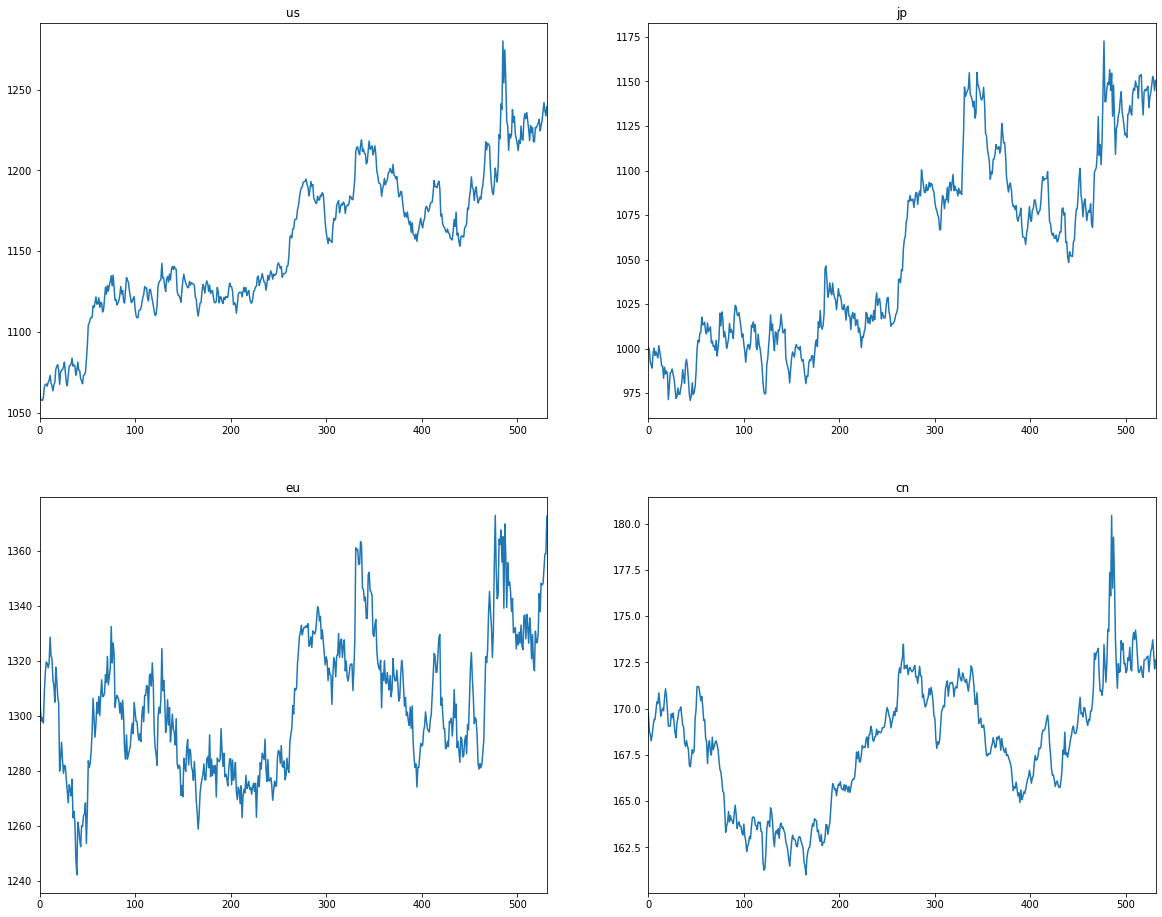

In [263]:
f,ax=plt.subplots(2,2,figsize=(20,16))
s_data['us'].plot(ax=ax[0,0]).set_title('us')
s_data['jp'].plot(ax=ax[0,1]).set_title('jp')
s_data['eu'].plot(ax=ax[1,0]).set_title('eu')
s_data['cn'].plot(ax=ax[1,1]).set_title('cn')

In [264]:
print(auto_arima(s_data['us'], seasonal=True, m=12,max_p=7, max_d=7,max_q=7, max_P=7, max_D=7,max_Q=7,trace=False).summary())
print(auto_arima(s_data['jp'], seasonal=True, m=12,max_p=7, max_d=7,max_q=7, max_P=7, max_D=7,max_Q=7,trace=False).summary())
print(auto_arima(s_data['eu'], seasonal=True, m=12,max_p=7, max_d=7,max_q=7, max_P=7, max_D=7,max_Q=7,trace=False).summary())
print(auto_arima(s_data['cn'], seasonal=True, m=12,max_p=7, max_d=7,max_q=7, max_P=7, max_D=7,max_Q=7,trace=False).summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  532
Model:               SARIMAX(1, 1, 3)   Log Likelihood               -1641.313
Date:                Sat, 30 May 2020   AIC                           3294.626
Time:                        22:18:41   BIC                           3320.274
Sample:                             0   HQIC                          3304.664
                                - 532                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0493      0.036      1.385      0.166      -0.020       0.119
ar.L1          0.8474      0.081     10.504      0.000       0.689       1.006
ma.L1         -0.9137      0.088    -10.418      0.0

In [265]:
st_data=s_data[-1:]
s_data=s_data[:-1]
stat=pd.DataFrame()  # us
stat2=pd.DataFrame() # jp
stat3=pd.DataFrame() # eu
stat4=pd.DataFrame() # cn

stat['or']=st_data[['us']].reset_index()['us']
stat2['or']=st_data[['jp']].reset_index()['jp']
stat3['or']=st_data[['eu']].reset_index()['eu']
stat4['or']=st_data[['cn']].reset_index()['cn']


In [266]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(s_data['us'], order=(1,1,3))
model2= SARIMAX(s_data['jp'], order=(1,1,1))
model3= SARIMAX(s_data['eu'], order=(0,1,1))
model4= SARIMAX(s_data['cn'], order=(3,1,1))

model_fit = model.fit(trend='nc',full_output=True, disp=1)
model_fit2= model2.fit(trend='nc',full_output=True, disp=1)
model_fit3= model3.fit(trend='nc',full_output=True, disp=1)
model_fit4= model4.fit(trend='nc',full_output=True, disp=1)

arima = model_fit.predict(start = len(s_data), end = len(s_data), typ="levels").rename("ARIMA Predictions")
stat['arima']=pd.DataFrame(arima).reset_index()['ARIMA Predictions']
arima = model_fit2.predict(start = len(s_data), end = len(s_data), typ="levels").rename("ARIMA Predictions")
stat2['arima']=pd.DataFrame(arima).reset_index()['ARIMA Predictions']
arima = model_fit3.predict(start = len(s_data), end = len(s_data), typ="levels").rename("ARIMA Predictions")
stat3['arima']=pd.DataFrame(arima).reset_index()['ARIMA Predictions']
arima = model_fit4.predict(start = len(s_data), end = len(s_data), typ="levels").rename("ARIMA Predictions")
stat4['arima']=pd.DataFrame(arima).reset_index()['ARIMA Predictions']

In [267]:
print(stat)
print(stat2)
print(stat3)
print(stat4)

       or        arima
0  1239.4  1232.008816
        or      arima
0  1150.63  1144.8211
        or        arima
0  1372.57  1358.598318
       or       arima
0  172.63  171.969624


In [270]:
# VAR 

from statsmodels.tsa.vector_ar.var_model import VAR

In [271]:
m2 = VAR(s_data[['us','jp','cn','eu']][:-1])

In [272]:
r=m2.fit()

In [273]:
r.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sat, 30, May, 2020
Time:                     22:24:37
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    8.06558
Nobs:                     529.000    HQIC:                   7.96732
Log likelihood:          -5073.11    FPE:                    2708.39
AIC:                      7.90411    Det(Omega_mle):         2608.37
--------------------------------------------------------------------
Results for equation us
           coefficient       std. error           t-stat            prob
------------------------------------------------------------------------
const        50.675277        18.596964            2.725           0.006
L1.us         0.969506         0.016395           59.134           0.000
L1.jp         0.035078         0.015686            2.236           0.025
L1.cn         0.148533

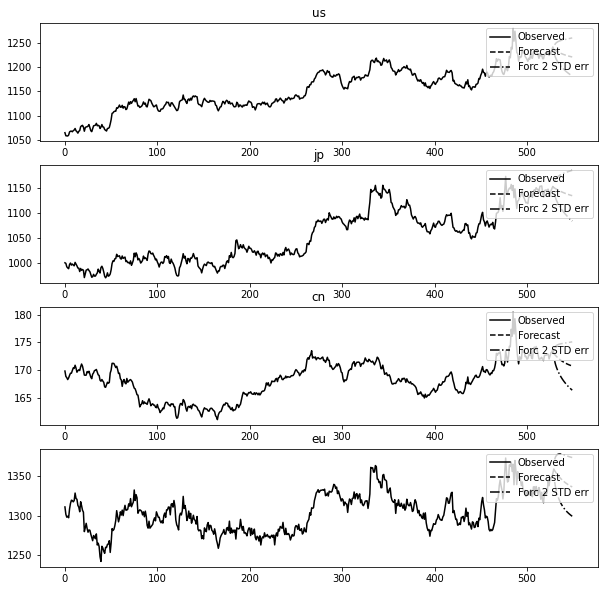

In [274]:
r.plot_forecast(20);

In [275]:
r.forecast(r.model.endog[-1:], 1)

array([[1235.78197742, 1149.44895763,  172.7979439 , 1356.87596623]])